In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [42]:
data = pd.read_csv("twitter_validation.csv",header= None)
data.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [43]:
data.tail()

,0,1,2,3
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [44]:
data.describe()

,0
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   int64 
 1   1       1000 non-null   object
 2   2       1000 non-null   object
 3   3       1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [46]:
data.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [47]:
data.shape

(1000, 4)

In [48]:
columns= ['Tweet ID','Subject','Sentiment', 'Text']
data.columns = columns
data.head()

,Tweet ID,Subject,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [49]:
data.columns

Index(['Tweet ID', 'Subject', 'Sentiment', 'Text'], dtype='object')

In [50]:
sentiments = data['Sentiment'].value_counts()
sentiments

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

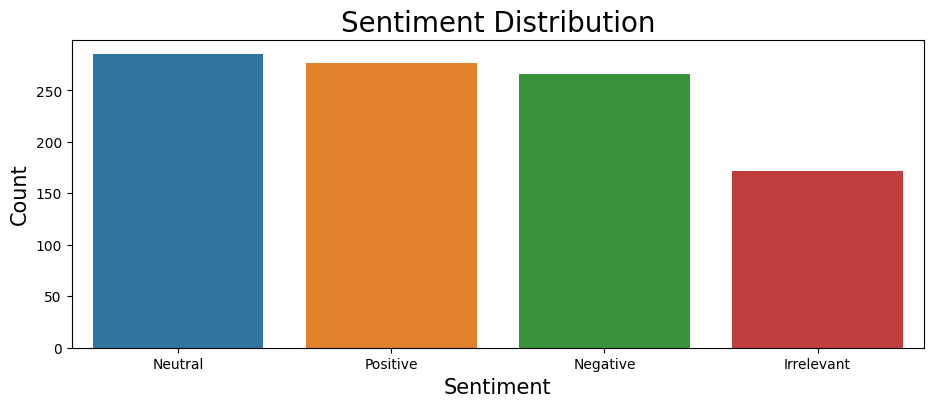

In [51]:
plt.figure(figsize=(11, 4))
sns.barplot(x=sentiments.index, y=sentiments.values)
plt.title('Sentiment Distribution',fontsize = 20)
plt.xlabel('Sentiment',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

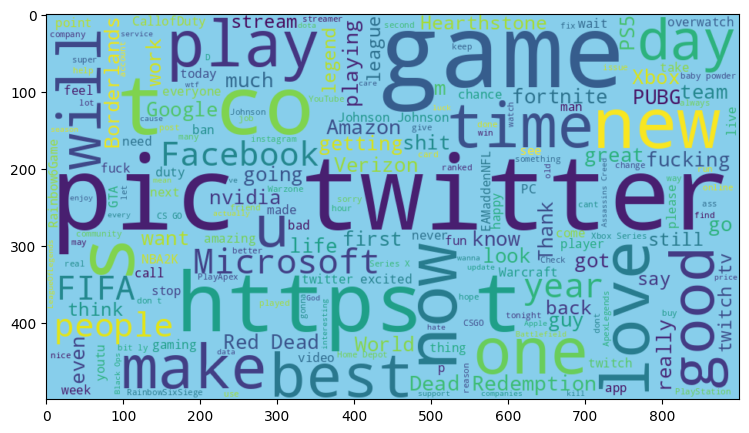

In [52]:
data['Text'] = data['Text'].astype(str)
text = ''.join(data['Text'])
wordcloud = WordCloud(width=900, height=500, background_color='skyblue').generate(text)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

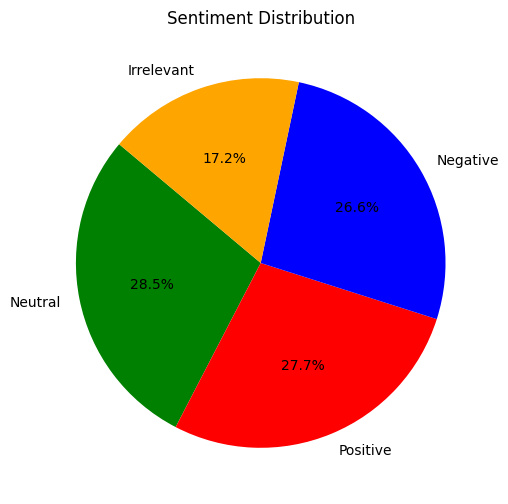

In [53]:
sentiment_counts = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue','orange']
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.show()